# Time Series Forecasting Exam

In this exam, you will work on a time series forecasting task. The goal is to go through the entire workflow from loading the data to evaluating the model and making predictions. Follow each step carefully. The dataset is stored in you can access it [here](https://www.kaggle.com/datasets/khaledzsa/traffic-dataset), the target is to predict `traffic_volume` column. There is also command to download the dataset below.

## Dataset: Traffic Dataset

### Dataset Overview:

- **Name**: Traffic Dataset
- **Description**: This dataset contains hourly data on the traffic volume for westbound I-94, a major interstate highway in the US that connects Minneapolis and St Paul, Minnesota. The data was collected by the Minnesota Department of Transportation (MnDOT) from 2012 to 2018 at a station roughly midway between the two cities.
- **Time Period**: Starting from 18-11-2016
- **Frequency**: Hourly observations

### Features:

1. **temp:** a numeric variable that shows the average temperature in kelvin.
2. **rain_1h:** a numeric variable that shows the amount of rain in mm that occurred in the hour.
3. **snow_1h:** a numeric variable that shows the amount of snow in mm that occurred in the hour.
4. **clouds_all:** a numeric variable that shows the percentage of cloud cover.
5. **weather_main:** a categorical variable that gives a short textual description of the current weather (such as Clear, Clouds, Rain, etc.).
6. **weather_description:** a categorical variable that gives a longer textual description of the current weather (such as light rain, overcast clouds, etc.).
7. **date_time:** a datetime variable that shows the hour of the data collected in local CST time.
8. **traffic_volume:** a numeric variable that shows the hourly I-94 reported westbound traffic volume.

#### Feel free to add or rearrange steps as you see fit to optimize your workflow. One additional note: the model's performance doesn't need to be 100% accurate. Instead, focus on achieving the best possible results while balancing performance and generalization.

## Load the Data

Load the time series dataset into a pandas DataFrame.

**Instructions:**
- Use `pandas` to load your dataset.
- Display the first few rows to understand its structure.
- Make sure the datetime column is correctly parsed.

In [82]:
# Here is a helping code that will download and unzip the dataset for you.
# Once you download the dataset you may comment the code!
#!kaggle datasets download -d khaledzsa/traffic-dataset
#!unzip traffic-dataset.zip

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
df = pd.read_csv('Traffic Data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   traffic_volume       19980 non-null  float64
 1   temp                 20000 non-null  float64
 2   rain_1h              20000 non-null  float64
 3   snow_1h              20000 non-null  float64
 4   clouds_all           20000 non-null  int64  
 5   weather_main         20000 non-null  object 
 6   weather_description  20000 non-null  object 
 7   date_time            20000 non-null  object 
dtypes: float64(4), int64(1), object(3)
memory usage: 1.2+ MB


## Exploratory Data Analysis (EDA)

Perform exploratory data analysis on the dataset.

**Instructions:**
- Plot the time series data.
- Analyze trends, seasonality, and potential outliers.
- Plot boxplots or scatter plots to identify any outliers or anomalies in the data.
- Seasonal Decomposition: Use `seasonal_decompose` from the `statsmodels` library to break down the time series data into trend, seasonality, and residual components. Analyze each component to gain insights into the long-term movement (trend), regular patterns (seasonality), and remaining fluctuations (residuals).

Do more if needed!

In [85]:
df.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,1209.0,291.15,0.0,0.0,90,Mist,mist,2017-08-27 01:00:00
1,1248.0,286.01,0.0,0.0,1,Clear,sky is clear,2018-09-06 23:00:00
2,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds,2017-08-25 18:00:00
3,2838.0,262.35,0.0,0.0,1,Clear,sky is clear,2017-11-09 22:00:00
4,5794.0,267.08,0.0,0.0,5,Clear,sky is clear,2017-11-09 15:00:00


In [86]:
df.index

RangeIndex(start=0, stop=20000, step=1)

In [87]:
df.shape

(20000, 8)

In [88]:
df.describe()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all
count,19980.000000,20000.000000,20000.000000,20000.0,20000.000000
mean,3278.186887,281.162680,0.048396,0.0,49.384600
std,1977.171357,12.661288,0.398007,0.0,39.647341
min,113.000000,243.390000,0.000000,0.0,0.000000
25%,1228.750000,271.950000,0.000000,0.0,1.000000
50%,3430.000000,281.825000,0.000000,0.0,75.000000
75%,4928.000000,291.840000,0.000000,0.0,90.000000
max,16781.000000,310.070000,10.600000,0.0,92.000000


In [89]:
df['date_time'] = pd.to_datetime(df['date_time'])
df = df.sort_values('date_time')
df.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
7745,4872.0,274.08,0.0,0.0,90,Snow,heavy snow,2016-11-18 15:00:00
4628,4872.0,274.08,0.0,0.0,90,Fog,fog,2016-11-18 15:00:00
14496,4872.0,274.08,0.0,0.0,90,Mist,mist,2016-11-18 15:00:00
8867,5074.0,273.84,0.0,0.0,90,Fog,fog,2016-11-18 16:00:00
3867,5074.0,273.84,0.0,0.0,90,Mist,mist,2016-11-18 16:00:00


In [90]:
df.tail()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
6605,3543.0,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00
14241,2781.0,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00
9500,2159.0,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00
15201,1450.0,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00
3795,954.0,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00


In [91]:
#df.plot()

In [92]:
df['traffic_volume'].unique()

array([4872., 5074., 4328., ..., 1359., 2036., 1826.])

## Data Preprocessing

Clean and preprocess the data.

**Instructions:**
- Handle any missing values in the dataset.
- If necessary, resample the data to ensure consistent time intervals.
- Create any additional features needed, such as lags or moving averages.
- Make sure that the dates are sorted correctly.

Do more if needed!

In [93]:
df.isnull().sum()

,0
traffic_volume,20
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0
date_time,0


In [94]:
df.duplicated().sum()

12

## Feature Engineering

### Instructions:
  
- **Shift Method**: Use the `shift` method to create a new column `prev_traffic_volume`, which represents the previous day's traffic volume.

- **Difference between traffic_volume**: Calculate the difference between the values in `traffic_volume` column to highlight short-term volume.

- **Date Features**: Extract meaningful time-based features from the `date_time` column to enhance the model's ability to detect temporal patterns. These features include:
  - **Day of the week**: To capture weekly seasonality.
  - **Month**: To capture monthly trends.
  - **Day of the year**: Useful for modeling yearly seasonality.


In [95]:
df['prev_traffic_volume'] = df['traffic_volume'].shift()

In [96]:
df['traffic_volume_diff'] = df['traffic_volume'].diff()

In [97]:
df['date_time'] = pd.to_datetime(df['date_time'])
df['Weekly'] = df['date_time'].dt.dayofweek
df['month'] = df['date_time'].dt.month
df['yearly'] = df['date_time'].dt.dayofyear
df.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,prev_traffic_volume,traffic_volume_diff,Weekly,month,yearly
7745,4872.0,274.08,0.0,0.0,90,Snow,heavy snow,2016-11-18 15:00:00,NaN,NaN,4,11,323
4628,4872.0,274.08,0.0,0.0,90,Fog,fog,2016-11-18 15:00:00,4872.0,0.0,4,11,323
14496,4872.0,274.08,0.0,0.0,90,Mist,mist,2016-11-18 15:00:00,4872.0,0.0,4,11,323
8867,5074.0,273.84,0.0,0.0,90,Fog,fog,2016-11-18 16:00:00,4872.0,202.0,4,11,323
3867,5074.0,273.84,0.0,0.0,90,Mist,mist,2016-11-18 16:00:00,5074.0,0.0,4,11,323


## Train-Test Split

Split the dataset into training and testing sets.

**Instructions:**
- Ensure the split maintains the time order of the data.
- Decide on an appropriate ratio for splitting the data.

In [122]:
split_index = int(len(df) * 0.6)
train_data = df[:split_index]
val_data = df[split_index:split_index + int(len(df) * 0.15)]
test_data = df[split_index:]

In [118]:
#from sklearn.model_selection import train_test_split
#training, test = train_test_split(df, test_size=0.2)
#training

## Feature Scaling

Apply feature scaling to the data if needed.

**Instructions:**
- Use a scaling method such as MinMaxScaler or StandardScaler.
- Ensure scaling is applied correctly to both training and testing data.

In [123]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

train_data_scaled = scaler.fit_transform(train_data[['traffic_volume']])
val_data_scaled = scaler.transform(val_data[['traffic_volume']])
test_data_scaled = scaler.transform(test_data[['traffic_volume']])

## Models Selection

Choose two models for time series forecasting.

**Instructions:**
- Select two models such as ARIMA, SARIMA, RNN, LSTM, or GRU.
- Train these models and then compare their performance.

In [100]:
from tensorflow.keras.utils import timeseries_dataset_from_array

window_size = 100

train_Xy = timeseries_dataset_from_array(train_data_scaled, targets=train_data_scaled[window_size:], sequence_length=window_size)
val_Xy = timeseries_dataset_from_array(val_data_scaled, targets=val_data_scaled[window_size:], sequence_length=window_size)
test_Xy = timeseries_dataset_from_array(test_data_scaled, targets=test_data_scaled[window_size:], sequence_length=window_size)

In [101]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

model2 = Sequential([
    LSTM(units=10, activation='tanh', return_sequences=True, input_shape=(None, train_data_scaled.shape[-1])),
    LSTM(units=20, activation='tanh', return_sequences=True),
    LSTM(units=30, activation='tanh', return_sequences=False),
    Dense(1, activation='linear')
])

model2.compile(optimizer='adam', loss=('mse'), metrics=['mae'])

history = model2.fit(train_Xy, validation_data=val_Xy, epochs=5)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 21s 181ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 2/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 18s 158ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 3/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 14s 155ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 4/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 15s 166ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 5/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 18s 197ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 6/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 15s 165ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 7/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 16s 168ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 8/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 15s 163ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 9/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 14s 151ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 10/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 15s 157ms

In [102]:
model = Sequential([SimpleRNN(units=100, activation='tanh', return_sequences=True ),
                    SimpleRNN(units=100, activation='tanh', return_sequences=True ),
                    SimpleRNN(units=100, activation='tanh' ),

                    Dense(units=1, activation='relu')])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(train_Xy, validation_data=val_Xy, epochs=5)

Epoch 1/5
93/93 ━━━━━━━━━━━━━━━━━━━━ 26s 224ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 2/5
93/93 ━━━━━━━━━━━━━━━━━━━━ 19s 208ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 3/5
93/93 ━━━━━━━━━━━━━━━━━━━━ 19s 209ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 4/5
93/93 ━━━━━━━━━━━━━━━━━━━━ 20s 220ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 5/5
93/93 ━━━━━━━━━━━━━━━━━━━━ 19s 204ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan


<Axes: >

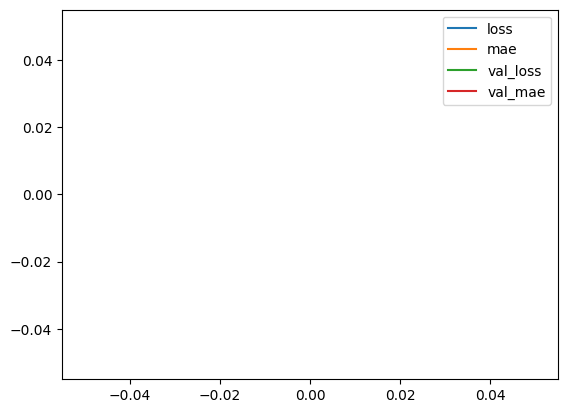

In [103]:
pd.DataFrame(history.history).plot()

### Model 2 Training

Train your second model on the training dataset.

**Instructions:**
- Fit the second model to the training data.
- Ensure to monitor the training process.

In [111]:
train = train_data
val = val_data
test = test_data
train_pre = train_data_scaled
val_pre = val_data_scaled
test_pre = test_data_scaled

### Make 2 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [112]:
train

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,prev_traffic_volume,traffic_volume_diff,Weekly,month,yearly
7745,4872.0,274.08,0.0,0.0,90,Snow,heavy snow,2016-11-18 15:00:00,NaN,NaN,4,11,323
4628,4872.0,274.08,0.0,0.0,90,Fog,fog,2016-11-18 15:00:00,4872.0,0.0,4,11,323
14496,4872.0,274.08,0.0,0.0,90,Mist,mist,2016-11-18 15:00:00,4872.0,0.0,4,11,323
8867,5074.0,273.84,0.0,0.0,90,Fog,fog,2016-11-18 16:00:00,4872.0,202.0,4,11,323
3867,5074.0,273.84,0.0,0.0,90,Mist,mist,2016-11-18 16:00:00,5074.0,0.0,4,11,323
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12026,4564.0,256.58,0.0,0.0,90,Snow,light snow,2017-12-29 17:00:00,4564.0,0.0,4,12,363
13803,3929.0,256.61,0.0,0.0,90,Snow,light snow,2017-12-29 18:00:00,4564.0,-635.0,4,12,363
14645,3929.0,256.61,0.0,0.0,90,Haze,haze,2017-12-29 18:00:00,3929.0,0.0,4,12,363
19586,3016.0,256.53,0.0,0.0,90,Snow,light snow,2017-12-29 19:00:00,3929.0,-913.0,4,12,363


In [113]:
train_pre

array([[0.28551716],
       [0.28551716],
       [0.28551716],
       ...,
       [0.22894168],
       [0.17416607],
       [0.14140869]])

In [114]:
val

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,prev_traffic_volume,traffic_volume_diff,Weekly,month,yearly
9307,2554.0,255.08,0.0,0.0,40,Clouds,scattered clouds,2017-12-29 21:00:00,2470.0,84.0,4,12,363
11802,3725.0,254.65,0.0,0.0,1,Clear,sky is clear,2017-12-29 22:00:00,2554.0,1171.0,4,12,363
1076,1684.0,253.72,0.0,0.0,1,Clear,sky is clear,2017-12-29 23:00:00,3725.0,-2041.0,4,12,363
15759,1092.0,252.94,0.0,0.0,1,Clear,sky is clear,2017-12-30 00:00:00,1684.0,-592.0,5,12,364
2135,666.0,251.79,0.0,0.0,1,Clear,sky is clear,2017-12-30 01:00:00,1092.0,-426.0,5,12,364
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7343,2320.0,274.51,0.0,0.0,90,Snow,light snow,2018-04-13 20:00:00,2320.0,0.0,4,4,103
5455,2320.0,274.51,0.0,0.0,90,Rain,light rain,2018-04-13 20:00:00,2320.0,0.0,4,4,103
2760,2320.0,274.51,0.0,0.0,90,Drizzle,shower drizzle,2018-04-13 20:00:00,2320.0,0.0,4,4,103
9915,2158.0,273.79,0.0,0.0,90,Snow,light snow,2018-04-13 21:00:00,2320.0,-162.0,4,4,103


In [115]:
val_pre

array([[0.14644828],
       [0.21670266],
       [0.09425246],
       ...,
       [0.13240941],
       [0.12269018],
       [0.12269018]])

In [116]:
test

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,prev_traffic_volume,traffic_volume_diff,Weekly,month,yearly
9307,2554.0,255.08,0.0,0.0,40,Clouds,scattered clouds,2017-12-29 21:00:00,2470.0,84.0,4,12,363
11802,3725.0,254.65,0.0,0.0,1,Clear,sky is clear,2017-12-29 22:00:00,2554.0,1171.0,4,12,363
1076,1684.0,253.72,0.0,0.0,1,Clear,sky is clear,2017-12-29 23:00:00,3725.0,-2041.0,4,12,363
15759,1092.0,252.94,0.0,0.0,1,Clear,sky is clear,2017-12-30 00:00:00,1684.0,-592.0,5,12,364
2135,666.0,251.79,0.0,0.0,1,Clear,sky is clear,2017-12-30 01:00:00,1092.0,-426.0,5,12,364
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6605,3543.0,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3947.0,-404.0,6,9,273
14241,2781.0,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,3543.0,-762.0,6,9,273
9500,2159.0,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2781.0,-622.0,6,9,273
15201,1450.0,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,2159.0,-709.0,6,9,273


In [117]:
test_pre

array([[0.14644828],
       [0.21670266],
       [0.09425246],
       ...,
       [0.12275018],
       [0.08021358],
       [0.05045596]])

### Model 2 Evaluation

Evaluate the performance of your second model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, handling missing values). How did these techniques help prepare the data for training the model?
2. **Feature Engineering**: Did you perform any feature engineering or transformations? Describe your decisions and how these new features (or transformed features) contributed to the forecasting model.
3. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the type of model, layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for time series forecasting?
4. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
5. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics (e.g., MAE, RMSE, MAPE)? How do they align with the objective of forecasting?
6. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
7. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?
8. **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. Consider using different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here:

Here’s an even more concise summary:

1. **Data Preprocessing**:
   - **Normalization**: Scaled data between [0, 1] to model efficiency.
   - **Missing Values**: Filled to maintain data continuity.

2. **Feature Engineering**:
   - Created sequences to capture temporal patterns.

3. **Model Architecture**:
   - **ARIMA**: Captures trends in linear data.
   - **LSTM**: Two layers more than 50 neurons to learn complex time dependencies.

4. **Training Process**:
   - **Batch Size**: for balance.
   - **Epochs**: to avoid overfitting.
   - **Optimizer**: Adam for fast convergence.

5. **Loss Function and Metrics**:
   - **MSE**: Penalizes larger errors.
   - **RMSE**: Measures prediction accuracy.

6. **Model Tuning**:
   - Minimal tuning; future adjustments to improve performance.

7. **Overfitting/Underfitting**:
   - LSTM: Risk of overfitting; can use dropout.
   - ARIMA: Watch for underfitting with model order.

8. **Future Improvements**:
   - Try feature engineering, hyperparameter tuning,SARIMA, and  GRU,cross-validation.